## Problem Statement



In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
Yelp is an app that provides a crowd-sourced review forum to business and services. The app is used publish crowd-sourced reviews about businesses.
Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 


## import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step1: Import Dataset

In [8]:
data = pd.read_csv('C:/Users/Akshay DS and AI/Desktop/Projects/P74-Project-7/Project 7/yelp.csv')

In [9]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
data.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [11]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [14]:
data['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# step 2: Visualize Data

In [15]:
data['length'] = data['text'].apply(len)

In [16]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

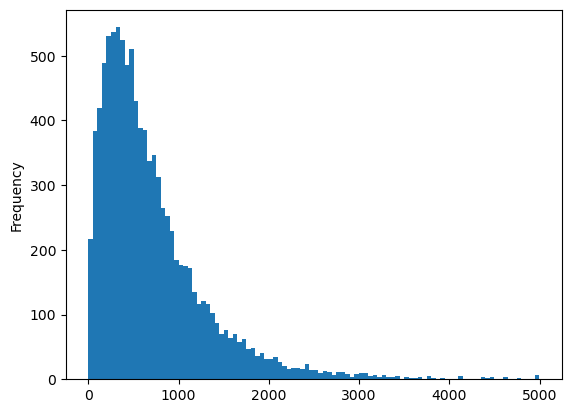

In [17]:
data['length'].plot(bins=100 , kind = 'hist')

In [18]:
data['length'].describe()


count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [21]:
data[data['length']==4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [22]:
data[data['length']==1]['text'].iloc[0]

'X'

In [24]:
data[data['length']==711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

<Axes: xlabel='stars', ylabel='count'>

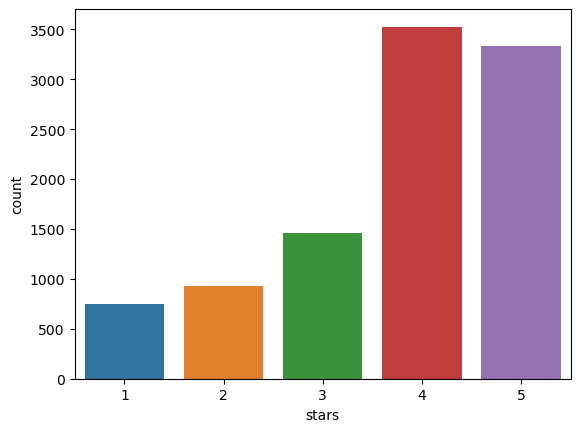

In [26]:
sns.countplot(x='stars',data=data)

C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


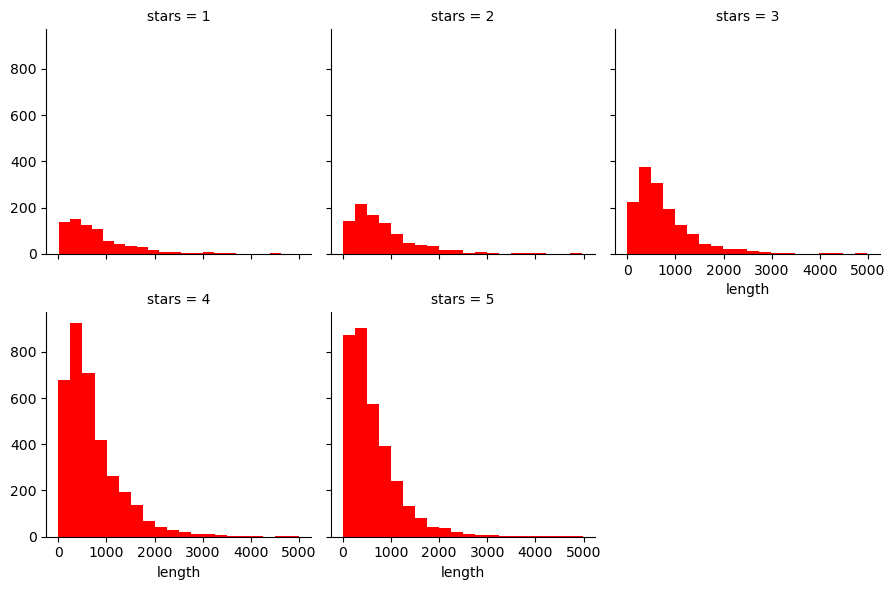

In [33]:
g = sns.FacetGrid(col = 'stars',data=data, col_wrap=3)

g.map(plt.hist,'length',bins=20,color='r')

In [34]:
data_1 = data[data['stars']==1]

In [35]:
data_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [36]:
data_5 = data[data['stars']==5]

In [37]:
data_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [38]:
yelp_data_1_5 = pd.concat([data_1,data_5])

In [39]:
yelp_data_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [40]:
yelp_data_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [41]:
print("1-star Review Percentage = ", (len(data_1)/len(yelp_data_1_5))*100 ,'%')

1-star Review Percentage =  18.330885952031327 %


In [42]:
print("5-star Review Percentage = ", (len(data_5)/len(yelp_data_1_5))*100 ,'%')

5-star Review Percentage =  81.66911404796868 %


<Axes: ylabel='count'>

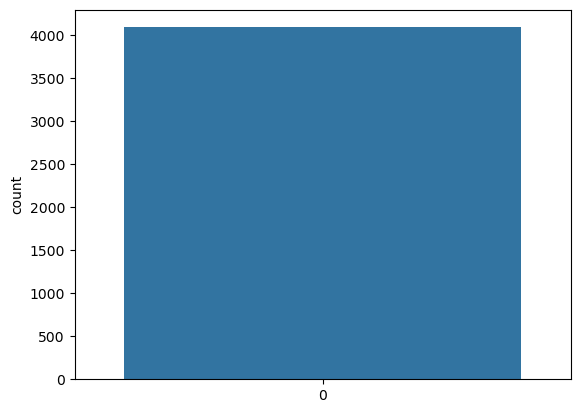

In [48]:
sns.countplot(yelp_data_1_5['stars'] , label='Count')

## Step 3: create training and testing data and cleaning

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Remove Punctuations

In [50]:
Test = 'Hello !!! Mr.E, What\'s up?'

In [51]:
Test_clean = [char for char in Test if char not in string.punctuation]

In [55]:
Test_clean_1 = "".join(Test_clean)

In [56]:
Test_clean_1

'Hello  MrE Whats up'

## Remove Stopwords

In [58]:
from nltk.corpus import stopwords

stopword = stopwords.words('english')


In [59]:
Test_clean_2  = [word for word in Test_clean_1.split() if word.lower() not in stopword]

In [60]:
Test_clean_2

['Hello', 'MrE', 'Whats']

In [61]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [62]:
mini_challenge

'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [63]:
import string

punctuations = string.punctuation

In [64]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
mini_challenge_1 ="".join([word for word in mini_challenge if word not in punctuations])

In [66]:
mini_challenge_1

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [67]:
from nltk.corpus import stopwords

stopword = stopwords.words('english')

In [68]:
mini_challenge_1_cleaned = [ word  for word in mini_challenge_1.split() if word not in stopword]

In [69]:
mini_challenge_1_cleaned

['Here', 'mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

## Count Vectorizer

In [70]:
sample_data = ['This is the first document','This document is the second document','This is the third document']


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample_data)

In [74]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'is', 'second', 'the', 'third', 'this'],
      dtype=object)

In [71]:
X


<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [72]:
X.toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [2, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [76]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

In [77]:
vectorizer2 = CountVectorizer()

In [78]:
v = vectorizer2.fit_transform(mini_challenge)

In [81]:
vectorizer2.get_feature_names_out()

array(['hello', 'world'], dtype=object)

In [79]:
v.toarray()

array([[1, 1],
       [2, 1],
       [1, 3]], dtype=int64)

   ## Apply all 3 processes to our data

In [84]:
def message_cleaning(message):
    test_punc_removed = "".join([ char for char in message if char not in string.punctuation])
    test_punc_removed_clean = [ word for word in test_punc_removed.split() if word.lower() not in stopword]
    return test_punc_removed_clean

In [85]:
yelp_clean = yelp_data_1_5['text'].apply(message_cleaning)

In [89]:
print(yelp_data_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [90]:
print(yelp_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [95]:
yelp_data_1_5['length'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: length, dtype: float64

<Axes: xlabel='stars', ylabel='count'>

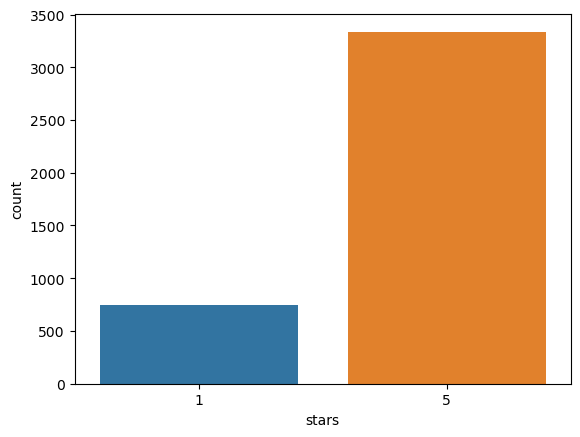

In [94]:
sns.countplot(x='stars',data=yelp_data_1_5)

In [104]:
yelp_data_1_5[yelp_data_1_5['length']==662]['text']

3571    Coming from a French family on my mom's side i...
7169    Habaneros is an awesome little gem stuck in th...
Name: text, dtype: object

In [105]:
print(yelp_clean[3571])

['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']


## COunt Vectorizer

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer  = CountVectorizer(analyzer= message_cleaning)

In [109]:
yelp_vectorizer = vectorizer.fit_transform(yelp_data_1_5['text'])

In [111]:
vectorizer.get_feature_names_out()

array(['0', '00s', '01042012', ..., 'École', 'éclairs', 'ém'],
      dtype=object)

In [112]:
yelp_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
yelp_vectorizer.shape

(4086, 26435)

## Training model

In [114]:
from sklearn.naive_bayes import  MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_data_1_5['stars'].values

In [115]:
yelp_data_1_5['stars'].values

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [116]:
NB_classifier.fit(yelp_vectorizer,label)

MultinomialNB()

In [121]:
#testing_sample = ['amazing food!! highly recommended']
testing_sample = ['shit food!! made me sick']

In [122]:
testing_sample_vectorizer = vectorizer.transform(testing_sample)

In [123]:
test_predict = NB_classifier.predict(testing_sample_vectorizer)

In [124]:
test_predict

array([1], dtype=int64)

## Dividing data and training

In [133]:
X = yelp_vectorizer
y= label

In [149]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [150]:
from sklearn.naive_bayes import  MultinomialNB

NB_classifier = MultinomialNB()


In [151]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [152]:
X_train.shape

(3268, 26435)

In [153]:
y_train.shape

(3268,)

In [154]:
X_test.shape

(818, 26435)

In [155]:
y_test.shape

(818,)

In [156]:
y_pred_train = NB_classifier.predict(X_train)
y_pred_test = NB_classifier.predict(X_test)

<Axes: >

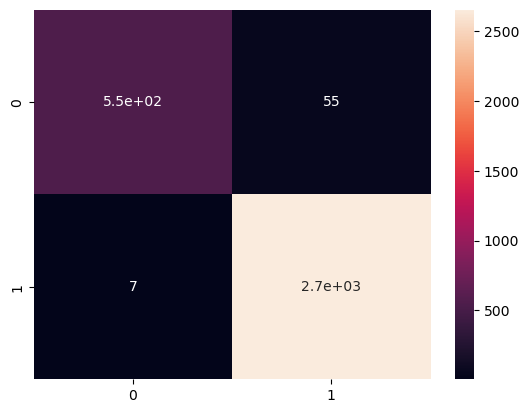

In [157]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_train,y_pred_train)

sns.heatmap(cm,annot=True)

In [158]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       0.99      0.91      0.95       608
           5       0.98      1.00      0.99      2660

    accuracy                           0.98      3268
   macro avg       0.98      0.95      0.97      3268
weighted avg       0.98      0.98      0.98      3268



<Axes: >

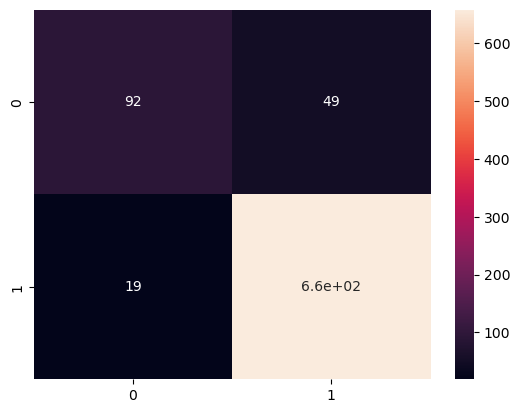

In [159]:
cm = confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm,annot=True)


In [160]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.83      0.65      0.73       141
           5       0.93      0.97      0.95       677

    accuracy                           0.92       818
   macro avg       0.88      0.81      0.84       818
weighted avg       0.91      0.92      0.91       818




## TF-TDF

In [164]:
from sklearn.feature_extraction.text import TfidfTransformer

yelp_tfidf = TfidfTransformer().fit_transform(yelp_vectorizer)

print(yelp_tfidf[:,:])

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

In [165]:
X = yelp_tfidf
y = label

In [166]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<Axes: >

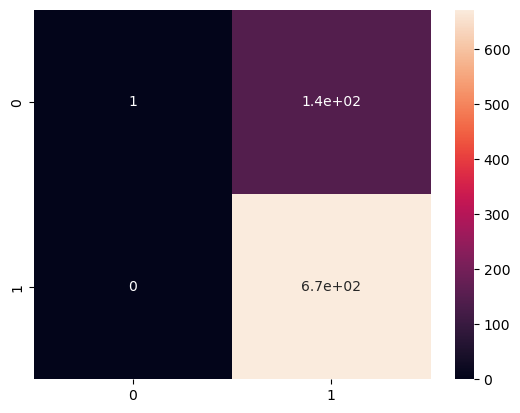

In [168]:
from sklearn.naive_bayes import  MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_pred_train = NB_classifier.predict(X_train)
y_pred_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm,annot=True)



In [169]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       146
           5       0.82      1.00      0.90       672

    accuracy                           0.82       818
   macro avg       0.91      0.50      0.46       818
weighted avg       0.85      0.82      0.74       818

